<a href="https://colab.research.google.com/github/prat-man/CSE-575-Statistical-Machine-Learning/blob/main/source/ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix, classification_report

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Dropout

In [2]:
import httpimport

with httpimport.remote_repo('https://raw.githubusercontent.com/prat-man/CSE-575-Statistical-Machine-Learning/main/source/utils'):
    from data import get_data

In [3]:
seed = 0

In [4]:
X_train, X_val, X_test, y_train, y_val, y_test, labels = get_data('ANN')

In [5]:
model_layers = [
    Input(X_train.shape[1]),

    Dense(64, activation='relu'),
    Dense(64, activation='relu'),
    Dense(64, activation='relu'),

    Dense(10, activation='softmax')
]

model = Sequential(model_layers)

In [6]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [7]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                3712      
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 64)                4160      
                                                                 
 dense_3 (Dense)             (None, 10)                650       
                                                                 
Total params: 12,682
Trainable params: 12,682
Non-trainable params: 0
_________________________________________________________________
None


In [8]:
model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=50, batch_size=64)

Epoch 1/50
10/10 [==============================] - 3s 51ms/step - loss: 2.2153 - accuracy: 0.1667 - val_loss: 2.0510 - val_accuracy: 0.3400
Epoch 2/50
10/10 [==============================] - 0s 13ms/step - loss: 1.9568 - accuracy: 0.3833 - val_loss: 1.8374 - val_accuracy: 0.4050
Epoch 3/50
10/10 [==============================] - 0s 9ms/step - loss: 1.7322 - accuracy: 0.4483 - val_loss: 1.6301 - val_accuracy: 0.4600
Epoch 4/50
10/10 [==============================] - 0s 13ms/step - loss: 1.5181 - accuracy: 0.4883 - val_loss: 1.4710 - val_accuracy: 0.5100
Epoch 5/50
10/10 [==============================] - 0s 18ms/step - loss: 1.3463 - accuracy: 0.5250 - val_loss: 1.3499 - val_accuracy: 0.5500
Epoch 6/50
10/10 [==============================] - 0s 14ms/step - loss: 1.2086 - accuracy: 0.5467 - val_loss: 1.2540 - val_accuracy: 0.5750
Epoch 7/50
10/10 [==============================] - 0s 9ms/step - loss: 1.0843 - accuracy: 0.6067 - val_loss: 1.1957 - val_accuracy: 0.6000
Epoch 8/50
10/1

In [9]:
_, accuracy = model.evaluate(X_train, y_train)
print(f'Training Accuracy: {accuracy}')

19/19 [==============================] - 0s 4ms/step - loss: 0.0497 - accuracy: 1.0000
Training Accuracy: 1.0


In [10]:
y_pred = model.predict(X_test)

y_true = np.argmax(y_test, axis=1)
y_pred = np.argmax(y_pred, axis=1)

7/7 [==============================] - 0s 2ms/step


In [11]:
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.68      0.65      0.67        20
           1       0.90      0.90      0.90        20
           2       0.78      0.70      0.74        20
           3       0.71      0.75      0.73        20
           4       0.65      0.65      0.65        20
           5       0.90      0.90      0.90        20
           6       0.94      0.85      0.89        20
           7       0.79      0.75      0.77        20
           8       0.65      0.55      0.59        20
           9       0.50      0.70      0.58        20

    accuracy                           0.74       200
   macro avg       0.75      0.74      0.74       200
weighted avg       0.75      0.74      0.74       200



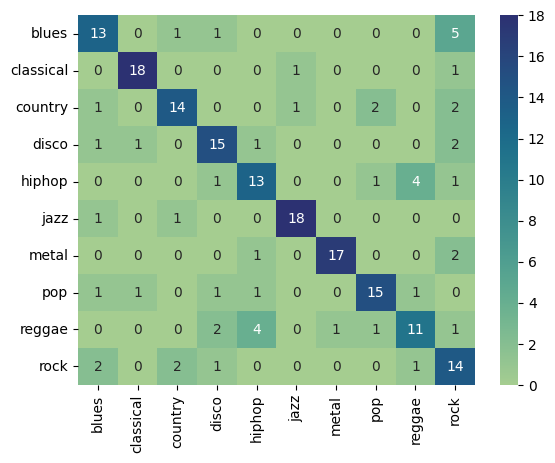

In [12]:
conf_m = confusion_matrix(y_true, y_pred)

sns.heatmap(conf_m, cmap='crest', annot=True)

plt.xticks(ticks = np.arange(0.5, 10, 1), labels=labels, rotation=90)
plt.yticks(ticks = np.arange(0.5, 10, 1), labels=labels,rotation=0)

plt.savefig('ANN_Confusion_Matrix.png', dpi=300)

In [13]:
accuracy = np.trace(conf_m) / np.sum(conf_m)
print(f'Overall test accuracy = {accuracy}')

Overall test accuracy = 0.74


In [14]:
accuracy_df = pd.DataFrame(columns=['accuracy'])

class_acc = conf_m.diagonal() / conf_m.sum(axis=1)
for i in range(len(labels)):
    accuracy_df.loc[labels[i]] = [round(class_acc[i], 2)]

accuracy_df

,accuracy
blues,0.65
classical,0.90
country,0.70
disco,0.75
hiphop,0.65
jazz,0.90
metal,0.85
pop,0.75
reggae,0.55
rock,0.70


In [15]:
model.save('ANN.h5')